In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(20, 15)})

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 1000)

train_data = pd.read_csv("train.csv", sep=",", encoding='cp1252')
test_data = pd.read_csv("test.csv", sep=",", encoding='cp1252')

latlong_data = pd.read_csv("latlons.csv", sep=",", encoding='cp1252')
addresses_data = pd.read_csv("addresses.csv", sep=",", encoding='cp1252')

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (11,12,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Eyeball the data

In [3]:
# step 2 - eyeball the data
train_data.head()

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,state,zip_code,non_us_str_code,country,ticket_issued_date,hearing_date,violation_code,violation_description,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,IL,60606,NaN,USA,2004-03-16 11:40:00,2005-03-21 10:30:00,9-1-36(a),Failure of owner to obtain certificate of comp...,Responsible by Default,250.0,20.0,10.0,25.0,0.0,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,MI,48208,NaN,USA,2004-04-23 12:30:00,2005-05-06 13:30:00,61-63.0600,Failed To Secure Permit For Lawful Use Of Buil...,Responsible by Determination,750.0,20.0,10.0,75.0,0.0,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0
2,22062,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",1449.0,LONGFELLOW,NaN,23658.0,P.O. BOX,DETROIT,MI,48223,NaN,USA,2004-04-26 13:40:00,2005-03-29 10:30:00,9-1-36(a),Failure of owner to obtain certificate of comp...,Not responsible by Dismissal,250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
3,22084,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","MOROSI, MIKE",1441.0,LONGFELLOW,NaN,5.0,ST. CLAIR,DETROIT,MI,48214,NaN,USA,2004-04-26 13:30:00,NaN,9-1-36(a),Failure of owner to obtain certificate of comp...,Not responsible by City Dismissal,250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
4,22093,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","NATHANIEL, NEAL",2449.0,CHURCHILL,NaN,7449.0,CHURCHILL,DETROIT,MI,48206,NaN,USA,2004-04-26 13:00:00,2005-03-29 10:30:00,9-1-36(a),Failure of owner to obtain certificate of comp...,Not responsible by Dismissal,250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN


In [4]:
latlong_data.head()

,address,lat,lon
0,"4300 rosa parks blvd, Detroit MI 48208",42.346169,-83.079962
1,"14512 sussex, Detroit MI",42.394657,-83.194265
2,"3456 garland, Detroit MI",42.373779,-82.986228
3,"5787 wayburn, Detroit MI",42.403342,-82.957805
4,"5766 haverhill, Detroit MI",42.407255,-82.946295


In [5]:
addresses_data.head()

,ticket_id,address
0,22056,"2900 tyler, Detroit MI"
1,27586,"4311 central, Detroit MI"
2,22062,"1449 longfellow, Detroit MI"
3,22084,"1441 longfellow, Detroit MI"
4,22093,"2449 churchill, Detroit MI"


In [6]:
test_data.head()

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,state,zip_code,non_us_str_code,country,ticket_issued_date,hearing_date,violation_code,violation_description,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,grafitti_status
0,284932,Department of Public Works,"Granberry, Aisha B","FLUELLEN, JOHN A",10041.0,ROSEBERRY,NaN,141,ROSEBERRY,DETROIT,MI,48213,NaN,USA,2012-01-04 14:00:00,2012-01-19 09:00:00,22-2-61,Failure to secure City or Private solid waste ...,Responsible by Default,200.0,20.0,10.0,20.0,0.0,0.0,250.0,NaN
1,285362,Department of Public Works,"Lusk, Gertrina","WHIGHAM, THELMA",18520.0,EVERGREEN,NaN,19136,GLASTONBURY,DETROIT,MI,48219,NaN,USA,2012-01-05 09:50:00,2012-02-06 09:00:00,22-2-88(b),Allowing bulk solid waste to lie or accumulate...,Responsible by Default,1000.0,20.0,10.0,100.0,0.0,0.0,1130.0,NaN
2,285361,Department of Public Works,"Lusk, Gertrina","WHIGHAM, THELMA",18520.0,EVERGREEN,NaN,19136,GLASTONBURY,DETROIT,MI,48219,NaN,USA,2012-01-05 09:50:00,2012-02-06 09:00:00,22-2-43,Improper placement of Courville container betw...,Responsible by Default,100.0,20.0,10.0,10.0,0.0,0.0,140.0,NaN
3,285338,Department of Public Works,"Talbert, Reginald","HARABEDIEN, POPKIN",1835.0,CENTRAL,NaN,2246,NELSON,WOODHAVEN,MI,48183,NaN,USA,2012-01-05 10:25:00,2012-02-07 09:00:00,22-2-88(b),Allowing bulk solid waste to lie or accumulate...,Responsible by Default,200.0,20.0,10.0,20.0,0.0,0.0,250.0,NaN
4,285346,Department of Public Works,"Talbert, Reginald","CORBELL, STANLEY",1700.0,CENTRAL,NaN,3435,MUNGER,LIVONIA,MI,48154,NaN,USA,2012-01-05 10:20:00,2012-02-14 09:00:00,22-2-45,Violation of time limit for approved container...,Responsible by Default,100.0,20.0,10.0,10.0,0.0,0.0,140.0,NaN


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ticket_id                   250306 non-null  int64  
 1   agency_name                 250306 non-null  object 
 2   inspector_name              250306 non-null  object 
 3   violator_name               250272 non-null  object 
 4   violation_street_number     250306 non-null  float64
 5   violation_street_name       250306 non-null  object 
 6   violation_zip_code          0 non-null       float64
 7   mailing_address_str_number  246704 non-null  float64
 8   mailing_address_str_name    250302 non-null  object 
 9   city                        250306 non-null  object 
 10  state                       250213 non-null  object 
 11  zip_code                    250305 non-null  object 
 12  non_us_str_code             3 non-null       object 
 13  country       

# SIDEBAR: Set aside "test" set

In [8]:
from sklearn.model_selection import train_test_split

train_data = train_data.set_index('ticket_id')
train_data['compliance'] = train_data['compliance'].astype('str')


# remove not responsible entries
train_data = train_data[train_data["compliance"] != "nan"]


X_train_data = train_data.drop(['compliance'], axis=1)
y_train_data = train_data['compliance']


X_train, X_test, y_train, y_test = train_test_split(X_train_data, y_train_data, random_state=0)

# use the test set to evaluate and troubleshoot the model after tuning parameters via cross-validation

# Clean the input data (apply to test set also, once complete)

In [9]:
# remove all columns that won't be available in the test set to minimize data leakage
train_set = X_train.drop(['payment_amount','payment_date','payment_status','balance_due','collection_status','compliance_detail'], axis = 1)


In [10]:
train_set.head()

,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,state,zip_code,non_us_str_code,country,ticket_issued_date,hearing_date,violation_code,violation_description,disposition,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,grafitti_status
ticket_id,,,,,,,,,,,,,,,,,,,,,,,,,,
129049,"Buildings, Safety Engineering & Env Department","Morris, John","MORTGAGE CAPITAL, MERRILL LYNCH",2723.0,CALVERT,NaN,339.0,S. WARMINSTER RD,HATSBORO,PA,19040,NaN,USA,2007-07-23 09:50:00,2007-08-08 10:30:00,9-1-81(a),Failure to obtain certificate of registration ...,Responsible by Default,250.0,20.0,10.0,25.0,0.0,0.0,305.0,NaN
223337,"Buildings, Safety Engineering & Env Department","O'Neal, Claude","WASIKOWSKI, HELENA",3146.0,FERRY,NaN,425.0,PONDVIEW DR,STERLING HEIGHTS,MI,48314,NaN,USA,2009-07-06 09:50:00,2009-10-06 09:00:00,9-1-81(a),Failure to obtain certificate of registration ...,Responsible by Default,250.0,20.0,10.0,25.0,0.0,0.0,305.0,NaN
165904,Department of Public Works,"Zizi, Josue","WATKINS, JAMES",2737.0,CLAIRMOUNT,NaN,2737.0,CLAIRMOUNT,DETROIT,MI,48206,NaN,USA,2008-03-24 09:45:00,2008-08-19 09:00:00,22-2-43,Improper placement of Courville container betw...,Responsible by Determination,100.0,20.0,10.0,0.0,0.0,0.0,130.0,NaN
90794,Detroit Police Department,"MILLER, JAMES","Estevan, Fernando",1127.0,CAVALRY,NaN,1127.0,Calalry,Detroit,MI,48209,NaN,USA,2006-09-12 14:15:00,2006-10-02 10:30:00,61-81.0100/32.0066,Open Storage/ Residential/ Inoperable Vehicles...,Responsible by Default,50.0,20.0,10.0,5.0,0.0,0.0,85.0,NaN
112188,"Buildings, Safety Engineering & Env Department","Sloane, Bennie J","CHARLETA MOORE, THEODORE",4885.0,ALTER,NaN,37766.0,P.O. BOX,OAK PARK,MI,48237,NaN,USA,2007-02-16 12:15:00,2007-05-31 15:00:00,9-1-36(a),Failure of owner to obtain certificate of comp...,Responsible by Default,250.0,20.0,10.0,25.0,0.0,0.0,305.0,NaN


In [11]:
#Change dtypes to string for cleaning: 

correct_dtypes =  {'agency_name': 'str',
                   'violation_street_number':'str',
                   'mailing_address_str_number':'str',
                   'inspector_name': 'str',
                   'violation_zip_code': 'str',
                   'city': 'str',
                   'state':'str',
                   'country':'str',
                   'zip_code': 'str',
                   'ticket_issued_date':'datetime64',
                   'hearing_date':'datetime64'}



for column, dtype in correct_dtypes.items():
    train_set[column] = train_set[column].astype(dtype)


#Cols to drop because data is not informative: 
train_set = train_set.drop(['grafitti_status','non_us_str_code','clean_up_cost', 'violation_zip_code', 'state_fee','admin_fee'], axis=1)



In [12]:
# clean up string data
# set text to lowercase

for col in train_set: 
    if (train_set[col].dtype == 'object'):
        train_set[col] = train_set[col].str.lower()
        train_set[col] = train_set[col].str.replace("\.0","")

train_set.head()

/var/folders/g6/f3k4_8hx0zj8db9mvxdvf4180000gn/T/ipykernel_23710/1672137315.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  train_set[col] = train_set[col].str.replace("\.0","")


,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,mailing_address_str_number,mailing_address_str_name,city,state,zip_code,country,ticket_issued_date,hearing_date,violation_code,violation_description,disposition,fine_amount,late_fee,discount_amount,judgment_amount
ticket_id,,,,,,,,,,,,,,,,,,,,
129049,"buildings, safety engineering & env department","morris, john","mortgage capital, merrill lynch",2723,calvert,339,s. warminster rd,hatsboro,pa,19040,usa,2007-07-23 09:50:00,2007-08-08 10:30:00,9-1-81(a),failure to obtain certificate of registration ...,responsible by default,250.0,25.0,0.0,305.0
223337,"buildings, safety engineering & env department","o'neal, claude","wasikowski, helena",3146,ferry,425,pondview dr,sterling heights,mi,48314,usa,2009-07-06 09:50:00,2009-10-06 09:00:00,9-1-81(a),failure to obtain certificate of registration ...,responsible by default,250.0,25.0,0.0,305.0
165904,department of public works,"zizi, josue","watkins, james",2737,clairmount,2737,clairmount,detroit,mi,48206,usa,2008-03-24 09:45:00,2008-08-19 09:00:00,22-2-43,improper placement of courville container betw...,responsible by determination,100.0,0.0,0.0,130.0
90794,detroit police department,"miller, james","estevan, fernando",1127,cavalry,1127,calalry,detroit,mi,48209,usa,2006-09-12 14:15:00,2006-10-02 10:30:00,61-81100/32066,open storage/ residential/ inoperable vehicles...,responsible by default,50.0,5.0,0.0,85.0
112188,"buildings, safety engineering & env department","sloane, bennie j","charleta moore, theodore",4885,alter,37766,p.o. box,oak park,mi,48237,usa,2007-02-16 12:15:00,2007-05-31 15:00:00,9-1-36(a),failure of owner to obtain certificate of comp...,responsible by default,250.0,25.0,0.0,305.0


In [13]:
# set categories
#Change dtypes to categories for cleaning: 

correct_dtypes =  {'agency_name': 'category',
                   'inspector_name': 'category',
                   'city': 'category',
                   'state':'category',
                   'country':'category',
                   'zip_code': 'category'}



for column, dtype in correct_dtypes.items():
    train_set[column] = train_set[column].astype(dtype)

train_set.head()

,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,mailing_address_str_number,mailing_address_str_name,city,state,zip_code,country,ticket_issued_date,hearing_date,violation_code,violation_description,disposition,fine_amount,late_fee,discount_amount,judgment_amount
ticket_id,,,,,,,,,,,,,,,,,,,,
129049,"buildings, safety engineering & env department","morris, john","mortgage capital, merrill lynch",2723,calvert,339,s. warminster rd,hatsboro,pa,19040,usa,2007-07-23 09:50:00,2007-08-08 10:30:00,9-1-81(a),failure to obtain certificate of registration ...,responsible by default,250.0,25.0,0.0,305.0
223337,"buildings, safety engineering & env department","o'neal, claude","wasikowski, helena",3146,ferry,425,pondview dr,sterling heights,mi,48314,usa,2009-07-06 09:50:00,2009-10-06 09:00:00,9-1-81(a),failure to obtain certificate of registration ...,responsible by default,250.0,25.0,0.0,305.0
165904,department of public works,"zizi, josue","watkins, james",2737,clairmount,2737,clairmount,detroit,mi,48206,usa,2008-03-24 09:45:00,2008-08-19 09:00:00,22-2-43,improper placement of courville container betw...,responsible by determination,100.0,0.0,0.0,130.0
90794,detroit police department,"miller, james","estevan, fernando",1127,cavalry,1127,calalry,detroit,mi,48209,usa,2006-09-12 14:15:00,2006-10-02 10:30:00,61-81100/32066,open storage/ residential/ inoperable vehicles...,responsible by default,50.0,5.0,0.0,85.0
112188,"buildings, safety engineering & env department","sloane, bennie j","charleta moore, theodore",4885,alter,37766,p.o. box,oak park,mi,48237,usa,2007-02-16 12:15:00,2007-05-31 15:00:00,9-1-36(a),failure of owner to obtain certificate of comp...,responsible by default,250.0,25.0,0.0,305.0


# Step 1: Explore the data visually


In [14]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119910 entries, 129049 to 89529
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   agency_name                 119910 non-null  category      
 1   inspector_name              119910 non-null  category      
 2   violator_name               119885 non-null  object        
 3   violation_street_number     119910 non-null  object        
 4   violation_street_name       119910 non-null  object        
 5   mailing_address_str_number  119910 non-null  object        
 6   mailing_address_str_name    119908 non-null  object        
 7   city                        119910 non-null  category      
 8   state                       119910 non-null  category      
 9   zip_code                    119910 non-null  category      
 10  country                     119910 non-null  category      
 11  ticket_issued_date          119910 

It appears we have 6 category vars, 2 time series vars, 6 continuous vars, and 8 string/text vars. Let's count each to see whether some are in fact a different type than we thought. 


In [15]:
var = []
levels = []
for col in train_set:
    var.append(col)
    levels.append(train_set[col].value_counts().count())
    
col_counts = pd.DataFrame({"variable": var, "levels": levels})
col_counts.sort_values(by="levels")

,variable,levels
15,disposition,4
0,agency_name,5
10,country,5
18,discount_amount,12
17,late_fee,33
16,fine_amount,36
19,judgment_amount,52
8,state,60
1,inspector_name,157
13,violation_code,182


Hm, some text variables may also be categorical (like country, agency name, and disposition).

First, let's focus on exploring non-location based, categorical data ...

In [34]:
low_cardinality_vars = train_set[["country", "agency_name", "disposition", "city","state", "inspector_name", "violation_description"]]

#for var in low_cardinality_vars: 
 #   print(low_cardinality_vars[var].unique())

In [17]:
# let's explore each variable's correlation with the outcome ...
graph_data = pd.merge(low_cardinality_vars, y_train, left_index=True, right_index=True)

In [33]:
# run contingency tables to start: https://www.geeksforgeeks.org/contingency-table-in-python/
contingency = pd.crosstab(graph_data['inspector_name'],
                            graph_data['compliance'], normalize="index")
contingency_abs = pd.crosstab(graph_data['inspector_name'],
                            graph_data['compliance'])

contingency_full = pd.merge(contingency, contingency_abs, left_index=True, right_index=True)

contingency_full.sort_values(by="1.0_y", ascending=False)

compliance,0.0_x,1.0_x,0.0_y,1.0_y
inspector_name,,,,
"samaan, neil j",0.927797,0.072203,6078,473
"o'neal, claude",0.933803,0.066197,5699,404
"hayes, billy j",0.921946,0.078054,4453,377
"morris, john",0.961670,0.038330,8430,336
"devaney, john",0.940980,0.059020,4783,300
"zizi, josue",0.922102,0.077898,3492,295
"sloane, bennie j",0.939466,0.060534,3973,256
"steele, jonathan",0.952335,0.047665,4935,247
"danielson, keith d",0.916407,0.083593,2642,241


In [19]:
# create dummy variables for each category
#low_cardinality_dummy_df = pd.concat([pd.get_dummies(low_cardinality_vars[col]) for col in low_cardinality_vars], axis=1, keys=low_cardinality_vars.columns)

In [20]:
graph_data.inspector_name.value_counts()

morris, john                  8766
samaan, neil j                6551
o'neal, claude                6103
steele, jonathan              5182
devaney, john                 5083
hayes, billy j                4830
sloane, bennie j              4229
sims, martinzie               4128
zizi, josue                   3787
doetsch, james                3241
danielson, keith d            2883
gailes, orbie j               2588
jones, leah                   2246
davis, darlene                2031
legge, gerald                 2010
havard, jacqueline            1820
sharpe, anthony               1802
johnson, lois                 1526
harris, rickey                1473
deramer, andrew               1463
moore, david                  1382
karwowski, stephen            1365
ellard, everett               1346
frazier, willie               1333
watson, jerry                 1252
talbert, reginald             1221
addison, michael              1221
matthews, delos               1219
williamson, lillett 

<AxesSubplot:xlabel='compliance', ylabel='inspector_name'>

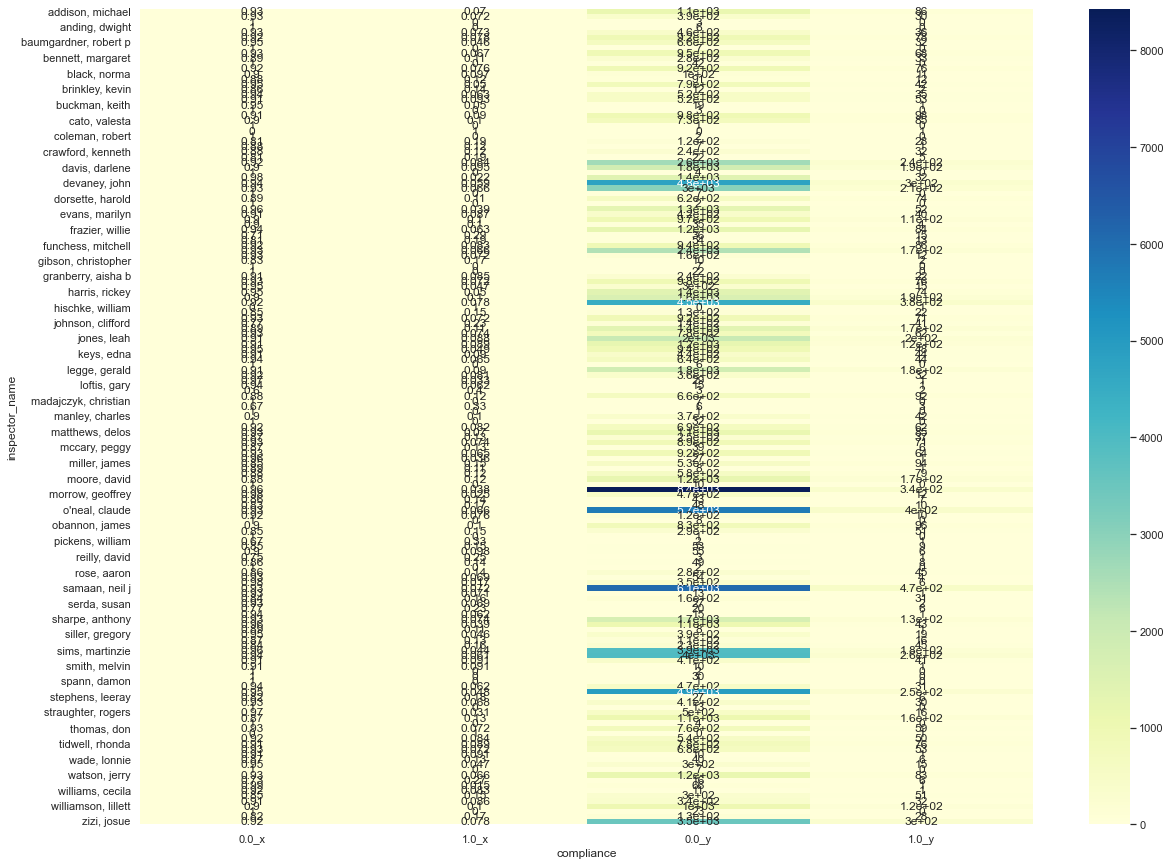

In [35]:
sns.heatmap(contingency_full, annot=True, cmap="YlGnBu")

Interesting, we can see that there appears to be a strong difference in outcome for 'disposition'. Now let's try 'agency name' ...

In [22]:
# run contingency tables to start: https://www.geeksforgeeks.org/contingency-table-in-python/
contingency = pd.crosstab(graph_data['agency_name'],
                            graph_data['compliance'], normalize="index")
contingency.sort_values(by="1.0", ascending=False).head()

compliance,0.0,1.0
agency_name,,
detroit police department,0.869033,0.130967
department of public works,0.909582,0.090418
health department,0.935214,0.064786
"buildings, safety engineering & env department",0.939279,0.060721
neighborhood city halls,1.000000,0.000000


In [23]:
graph_data.agency_name.value_counts()

buildings, safety engineering & env department    71886
department of public works                        39284
health department                                  5387
detroit police department                          3352
neighborhood city halls                               1
Name: agency_name, dtype: int64

<AxesSubplot:xlabel='compliance', ylabel='agency_name'>

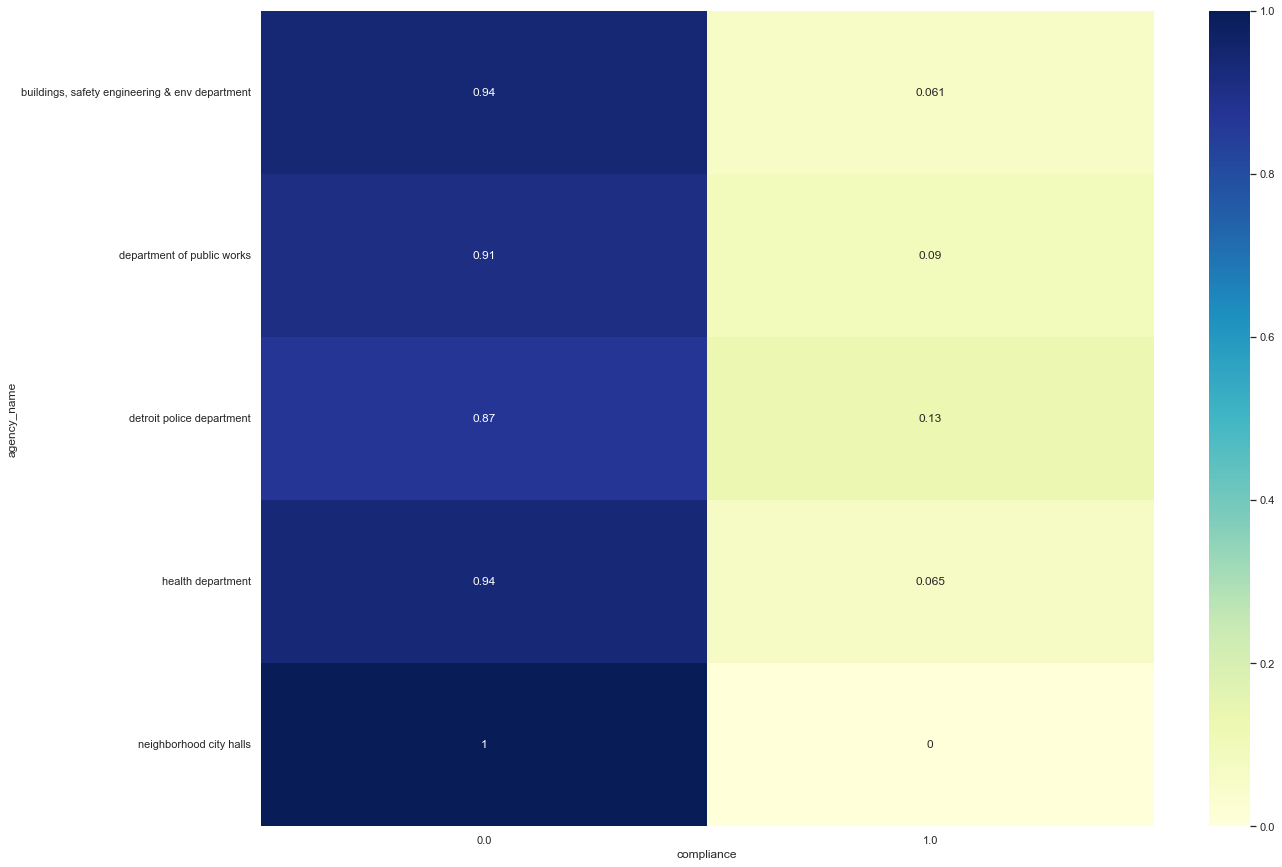

In [24]:
sns.heatmap(contingency, annot=True, cmap="YlGnBu")

## Step 1.1: Separate the variables by type

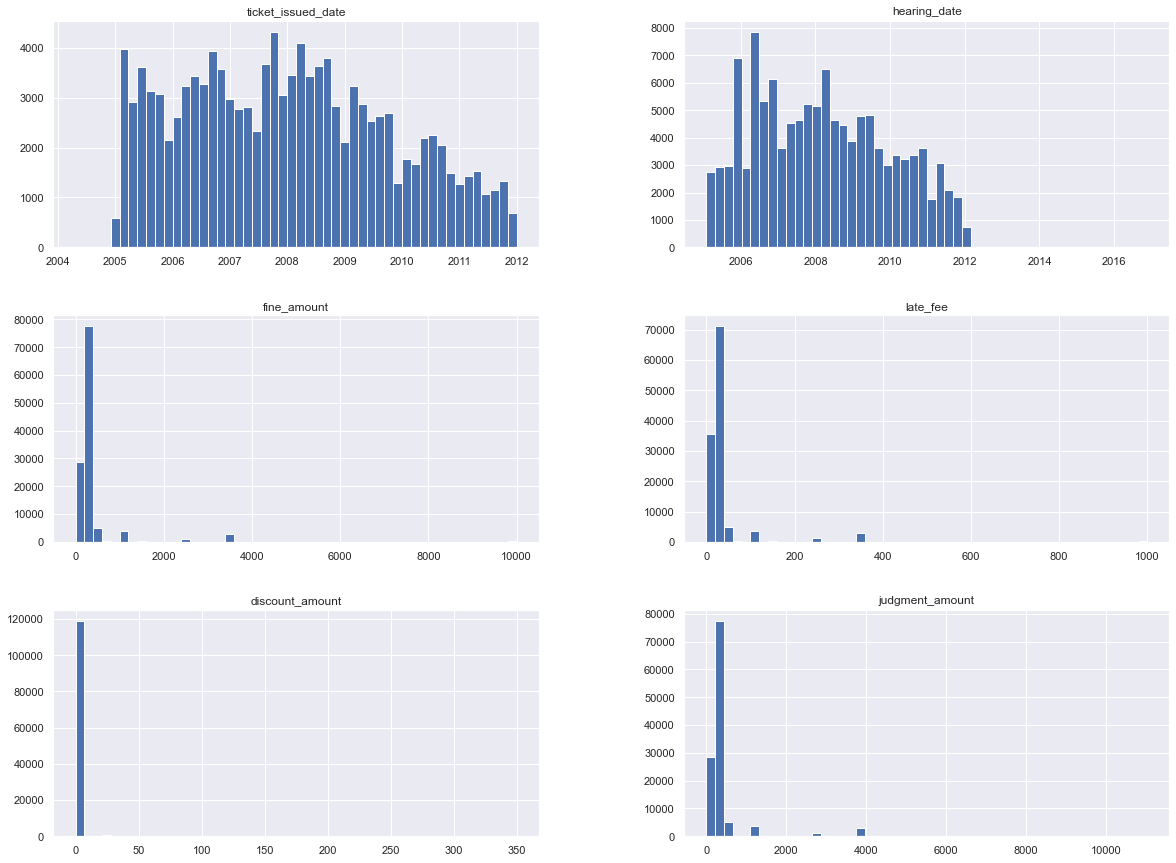

In [25]:
train_set.hist(bins=50, figsize=(20, 15))
plt.show()

In [26]:
train_set.describe()

,fine_amount,late_fee,discount_amount,judgment_amount
count,119910.000000,119910.000000,119910.000000,119910.000000
mean,357.414986,33.712589,0.197782,421.087045
std,678.669496,68.024988,4.248735,745.944085
min,0.000000,0.000000,0.000000,0.000000
25%,200.000000,10.000000,0.000000,250.000000
50%,250.000000,25.000000,0.000000,305.000000
75%,250.000000,25.000000,0.000000,305.000000
max,10000.000000,1000.000000,350.000000,11030.000000


# Visualize address data

In [27]:
# merge latlong with addresses, then merge this with y_train
geo_address_data = pd.merge(addresses_data, latlong_data, how="left", on="address").set_index("ticket_id")
geo_train_set = pd.merge(train_set, geo_address_data, left_index=True, right_index=True)



In [28]:


sns.scatterplot(data=geo_train_set,  x="lon", y="lat", hue="compliance")
plt.xlim([-83.3, -82.9])
plt.ylim([42.2, 42.5])

ValueError: Could not interpret value `compliance` for parameter `hue`

In [ ]:
# try using Seaborn to split out the data into a facegrid, with 10% of the data

sample_data = geo_train_set.sample(frac=0.1, replace=False, random_state=1)

g = sns.FacetGrid(sample_data, col="compliance", hue="compliance", height=7)
g.map(sns.scatterplot, "lon", "lat", alpha=.7)
g.set(xlim=(-83.3, -82.9), ylim=(42.2, 42.5))



In [ ]:
# find addresses that match geolocation data

violation_address_data = geo_train_set[["violation_street_number", "violation_street_name", "address"]]
violation_address_data['number_match'] = violation_address_data.apply(lambda x: x.violation_street_number in x.address, axis=1)
violation_address_data['street_match'] = violation_address_data.apply(lambda x: x.violation_street_name in x.address, axis=1)

In [ ]:
# step 4: isolate the ones that don't match and remove

to_omit = [violation_address_data[violation_address_data['number_match']==False],
           violation_address_data[violation_address_data['street_match']==False]]

# Feature selection
Using https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/ as a reference, since there isn't any coverage of this in the fucking curriculum. 

Also helpful: 
https://datascience.stackexchange.com/questions/14084/binary-classification-best-ways-to-pre-procees-the-data

In [ ]:
geo_train_set.info()

In [ ]:
plot(

## Step 1: What kind of features do we have?

According to the above, we have 7 category features, 2 time-series features, 8 numerical features, and 9 text/object features. 

We now need to prep/scale each type of data for machine learning. 



In [ ]:
cat_cols = (geo_train_set.dtypes == 'category')

In [ ]:
cat_cols = list(cat